<a href="https://colab.research.google.com/github/obeabi/Bayesian_AB_Testing/blob/main/ucb1_BERNOULI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

Bandit Class

In [3]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

UCB1 Function

In [4]:
def ucb(mean, n, nj):
  return mean + np.sqrt(2*np.log(n)/ nj)

Experiment function

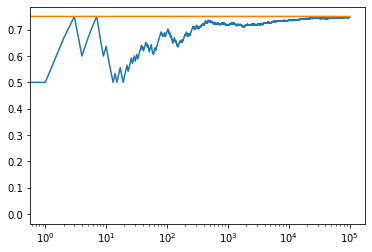

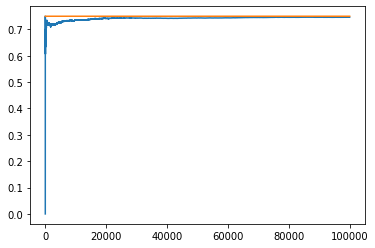

0.13559322033898305
0.45228215767634855
0.7472693900885633
total reward earned: 74619.0
overall win rate: 0.74619
num times selected each bandit: [59.0, 241.0, 99703.0]


In [5]:
def run_experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.empty(NUM_TRIALS)
  total_plays = 0

  # initialization: play each bandit once
  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)
  
  for i in range(NUM_TRIALS):
    j = np.argmax( [ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

    # for the plot
    rewards[i] = x
  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

# plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  # plot moving average ctr linear
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  for b in bandits:
    print(b.p_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  return cumulative_average

if __name__ == '__main__':
  run_experiment()
